## ***Name : `Fawad Ali Shaikh`***
## ***Task 2: `Predict Future Stock Prices (Short-Term)`***
## ***Linkedin : [Fawad Ali](https://www.linkedin.com/in/fawad-ali5)***

## ***Import Libraries***

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


## ***Load Dataset***

In [105]:
# Configuration
TICKER = 'AAPL' # Apple Inc.
START_DATE = '2020-01-01'
END_DATE = '2024-01-01'
FEATURES = ['Open', 'High', 'Low', 'Volume']
TARGET = 'Target_Close'

In [106]:
# Data Retrieval
print(f"Fetching historical data for {TICKER}...")
try:
    df = yf.download(TICKER, start=START_DATE, end=END_DATE, progress=True)
    if df.empty:
        raise ValueError("No data returned from yfinance.")
except Exception as e:
    print(f"Error fetching data: {e}")
    exit()

/tmp/ipython-input-2913502666.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, start=START_DATE, end=END_DATE, progress=True)
[*********************100%***********************]  1 of 1 completed

Fetching historical data for AAPL...


In [107]:
# First five rows
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.468254,72.528574,71.223252,71.476592,135480400
2020-01-03,71.763718,72.523746,71.539330,71.696160,146322800
2020-01-06,72.335579,72.374185,70.634562,70.885494,118387200
2020-01-07,71.995354,72.600960,71.775789,72.345204,108872000
2020-01-08,73.153496,73.455095,71.698581,71.698581,132079200


In [108]:
# Shape of data

df.shape

(1006, 5)

- ***So, we have `1006` rows and `5` columns***

In [109]:
# Information about data
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1006 non-null   float64
 1   (High, AAPL)    1006 non-null   float64
 2   (Low, AAPL)     1006 non-null   float64
 3   (Open, AAPL)    1006 non-null   float64
 4   (Volume, AAPL)  1006 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 47.2 KB


- ***So, all columns have `numeric` datatype***

In [110]:
# Columns in the dataset

df.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [111]:
print(f'So we have missing values in dataset \n{df.isnull().sum()}')

So we have missing values in dataset 
Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


- ***No Missing Values in te dataset***

In [112]:
# Check Dupliate Values

print(f'So we have duplicate values in dataset \n{df.duplicated().sum()}')

So we have duplicate values in dataset 
0


## ***Feature Enginering***

In [113]:
# Define the Target Variable
# The objective is to predict the 'Close' price of the *next* day.
# We shift the 'Close' column up by 1 position (shift(-1)).
# The last row will become NaN because there is no 'next day' to predict.
df[TARGET] = df['Close'].shift(-1)

In [114]:
df.tail()

Price,Close,High,Low,Open,Volume,Target_Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2023-12-22,191.788773,193.581837,191.164662,193.353978,37149600,191.243912
2023-12-26,191.243912,192.076049,191.025969,191.798670,28919300,191.342957
2023-12-27,191.342957,191.689688,189.302232,190.689143,48087700,191.768936
2023-12-28,191.768936,192.838834,191.362768,192.323695,34049900,190.728760
2023-12-29,190.728760,192.581260,189.936241,192.085938,42672100,NaN


In [115]:
# Drop the last row
df.dropna(inplace=True)

In [116]:
print(f"Data shape after feature engineering: {df.shape}")

Data shape after feature engineering: (1005, 6)


- ***After Feature Enginering, we have `1005` rows and `6` columns***

In [117]:
df.tail()

Price,Close,High,Low,Open,Volume,Target_Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2023-12-21,192.858658,195.236214,191.689705,194.265386,46482500,191.788773
2023-12-22,191.788773,193.581837,191.164662,193.353978,37149600,191.243912
2023-12-26,191.243912,192.076049,191.025969,191.798670,28919300,191.342957
2023-12-27,191.342957,191.689688,189.302232,190.689143,48087700,191.768936
2023-12-28,191.768936,192.838834,191.362768,192.323695,34049900,190.728760


In [118]:
# Prepare data for ML model
X = df[FEATURES]
y = df[TARGET]

In [119]:
# Split the data into training and testing sets
# Shuffle is set to False to maintain the time series order
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

In [120]:
print(f"Train set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

Train set size: 804, Test set size: 201


In [121]:
# call the model
model = LinearRegression()


In [122]:
# train the model

model.fit(X_train, y_train)

LinearRegression()

In [123]:
# take out model intercept and slop, make an equation
print(model.intercept_)
print(model.coef_)
print('y = ', model.intercept_, '+', model.coef_, '* X')

0.7222785386590687
[-8.05976778e-01  8.06729304e-01  9.96099816e-01  1.03107489e-09]
y =  0.7222785386590687 + [-8.05976778e-01  8.06729304e-01  9.96099816e-01  1.03107489e-09] * X


In [124]:
# prediction
y_pred = model.predict(X_test)

In [125]:
# Create a DataFrame for easy plotting and comparison
predictions_df = pd.DataFrame({
    'Actual Close': y_test,
    'Predicted Close': y_pred
}, index=X_test.index)

In [126]:
# evaluate the model
print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 = ', r2_score(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE =  4.955209825353888
R2 =  0.9579012596875757
RMSE =  2.2260300594003417


- ***So, the r2_score is `0.95` which is good, MSE is `4.95` and RMSE is `2.22`***

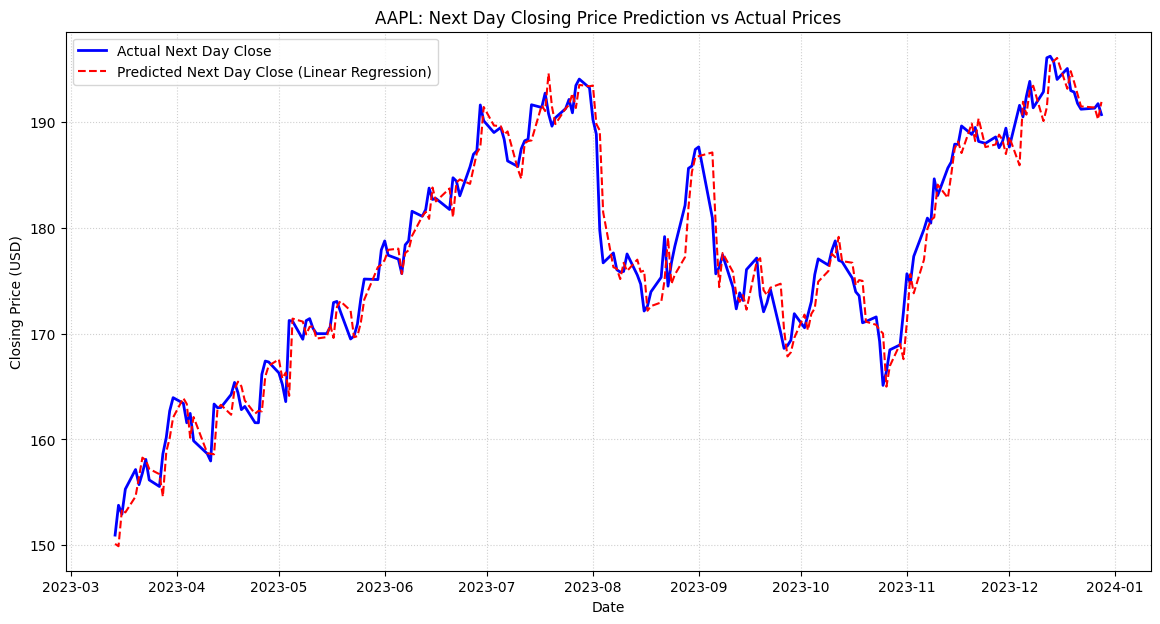

In [127]:
# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(predictions_df.index, predictions_df['Actual Close'], label='Actual Next Day Close', color='blue', linewidth=2)
plt.plot(predictions_df.index, predictions_df['Predicted Close'], label='Predicted Next Day Close (Linear Regression)', color='red', linestyle='--', linewidth=1.5)

plt.title(f'AAPL: Next Day Closing Price Prediction vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True, which='both', linestyle=':', alpha=0.6)
plt.show()

In [128]:
# Display a few predicted vs actual values
print("\n--- Actual vs. Predicted (First 10 Test Days) ---")
print(predictions_df.head(10).round(2))


--- Actual vs. Predicted (First 10 Test Days) ---
            Actual Close  Predicted Close
Date                                     
2023-03-14        150.95           150.12
2023-03-15        153.77           149.89
2023-03-16        152.93           153.37
2023-03-17        155.30           153.09
2023-03-20        157.15           154.60
2023-03-21        155.72           156.42
2023-03-22        156.81           158.27
2023-03-23        158.11           158.04
2023-03-24        156.17           157.21
2023-03-27        155.54           156.71
